## I am Attempting to do a data analysis on a dataset provided in my just completed **LUX DEV Data Science** for Everyone Bootcamp. I uploaded the dataset to an SQL server and I'll be querying it directly from the server using pyodbc SQL connection library  and giving key insights on the data by plotting using matplotlib and doing data transformation using numpy and pandas

In [65]:
import pandas as pd
from matplotlib import pyplot as plt
import pyodbc
import numpy as np


Initiating a connection to the local database using pyodbc 

In [66]:
conn = pyodbc.connect(
    Driver="ODBC Driver 17 for SQL Server",
    Server="JAQENIZO\SQLEXPRESS",
    Trusted_connection="Yes",
    Database='CRAIGSLIST'
)

cursor = conn.cursor()

Querying  vehicles from the database that took the shortest time to sell 

In [ ]:
query1 = """
SELECT manufacturer,model,stay_length from VEHICLES_DETAILS  where stay_length ='short'
"""

cursor.execute(query1)
shortStays = cursor.fetchall()

In [ ]:
#Used set to drop duplicates in the manufacturers 
manufacc =list(set(np.array([i[0] for i in shortStays])))
allManufacc = [i[0] for i in shortStays]
count_manufacc = []
for i in manufacc:
    count_manufacc.append((i,allManufacc.count(i)))
    

df= pd.DataFrame(index=[i[0]for i in count_manufacc],columns=["number_of_veh"],data=[i[1] for i in count_manufacc])
df.sort_values(by=["number_of_veh"],inplace=True,ascending=False)
# print(df.values.reshape(len(df.values)))


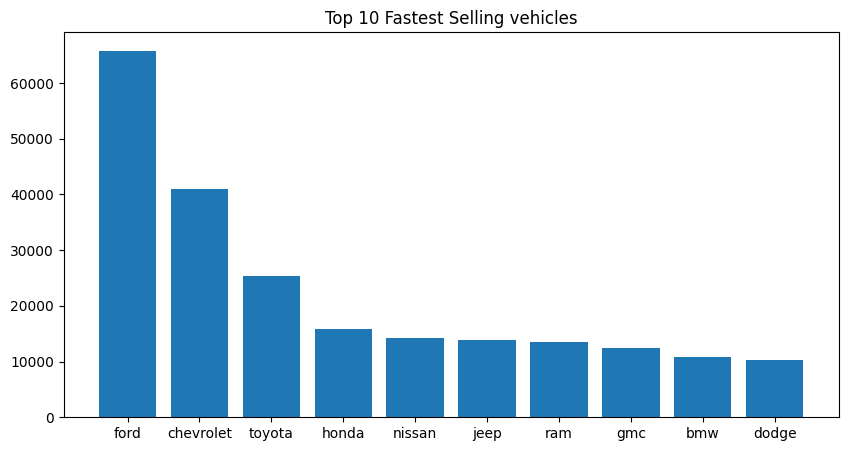

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(df.index[:10],df.values.reshape(len(df.values))[:10])
plt.title("Top 10 Fastest Selling vehicles")
plt.show()

In [ ]:
query2 = """
SELECT veh_state,stay_length from VEHICLES_DETAILS WHERE stay_length='long'
"""
cursor.execute(query2)
longStates = [i[0] for i in cursor.fetchall()]
countState = []
for i in longStates:
    countState.append((i,longStates.count(i)))

countState= list(set(countState))
dfStates = pd.DataFrame(data=[i[1] for i in countState],columns=["num_vehicles"],index=[i[0] for i in countState])
dfStates.sort_values(by=["num_vehicles"],ascending=False,inplace=True)




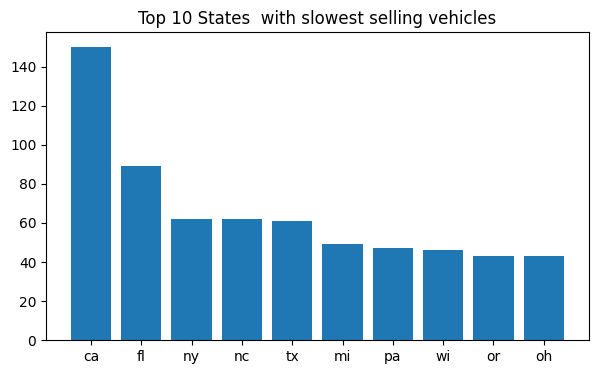

In [ ]:
plt.figure(figsize=(7,4))
plt.bar(dfStates.index[:10],[i for i in dfStates.values.reshape(len(dfStates.values))][:10])
plt.title("Top 10 States  with slowest selling vehicles")
plt.show()

In [ ]:
query3 = """
SELECT veh_state,stay_length from VEHICLES_DETAILS WHERE stay_length ='short'
"""

cursor.execute(query3)
shortStayStates = [i[0] for i in cursor.fetchall()]
shortStayStates
uniqueStates = list(set(shortStayStates))
countStates = []
for i in uniqueStates:
    countStates.append((i,shortStayStates.count(i)))

dfShortState = pd.DataFrame(data=[i[1] for i in countStates],columns=["num_of_veh"],index=[i[0] for i in countStates])
dfShortState.sort_values(by=['num_of_veh'],inplace=True,ascending=False)
# shortStayStates


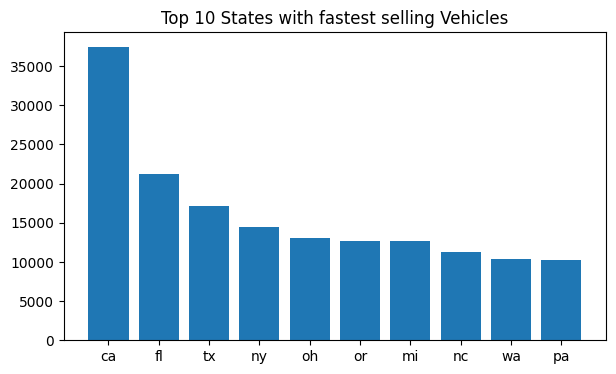

In [ ]:
plt.figure(figsize=(7,4))
plt.bar(dfShortState.index[:10],dfShortState.values.reshape(len(dfShortState.values))[:10])
plt.title("Top 10 States with fastest selling Vehicles")
plt.show()

In [ ]:
query4 = """
SELECT manufacturer,car_type from VEHICLES_DETAILS WHERE stay_length='short'
"""

cursor.execute(query4)

fastSelling = [i[0] for i in cursor.fetchall()]


In [ ]:
fastSellingBrands = set(fastSelling)
vehNumber = []

for i in fastSellingBrands:
    vehNumber.append((i,fastSelling.count(i)))
vehNumber

dfFastSelling = pd.DataFrame(data=[i[1] for i in vehNumber],columns=["num_of_veh"],index=[i[0] for i in vehNumber])
dfFastSelling.sort_values(by=["num_of_veh"],inplace=True,ascending=False)

# dfFastSelling

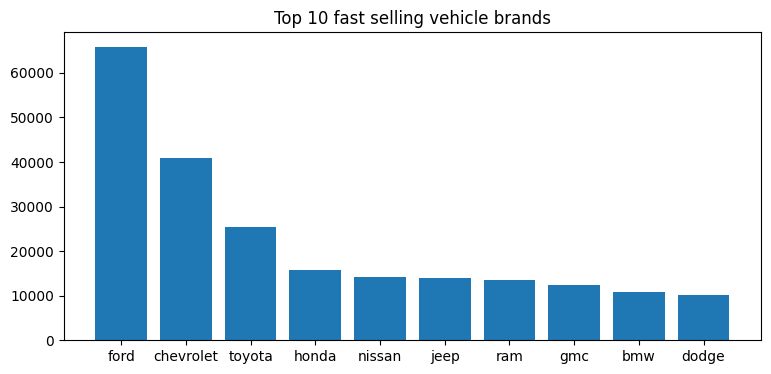

In [ ]:
plt.figure(figsize=(9,4))
plt.bar(dfFastSelling.index[:10], dfFastSelling.values.reshape(len(dfFastSelling.values))[:10])
plt.title("Top 10 fast selling vehicle brands")
plt.show()



In [ ]:
query5= """

SELECT car_type,manufacturer FROM vehicles_details WHERE  stay_length='short'

"""


cursor.execute(query5)

shortTypes = [ i[0] for i in cursor.fetchall()]
countTypes =[(i,shortTypes.count(i)) for i in set(shortTypes)]
dfcountTypes = pd.DataFrame(countTypes,columns=["Types","num_of_veh"])
dfcountTypes.set_index("Types",inplace=True)
dfcountTypes.sort_values(by=["num_of_veh"],ascending=False,inplace=True)
# dfcountTypes

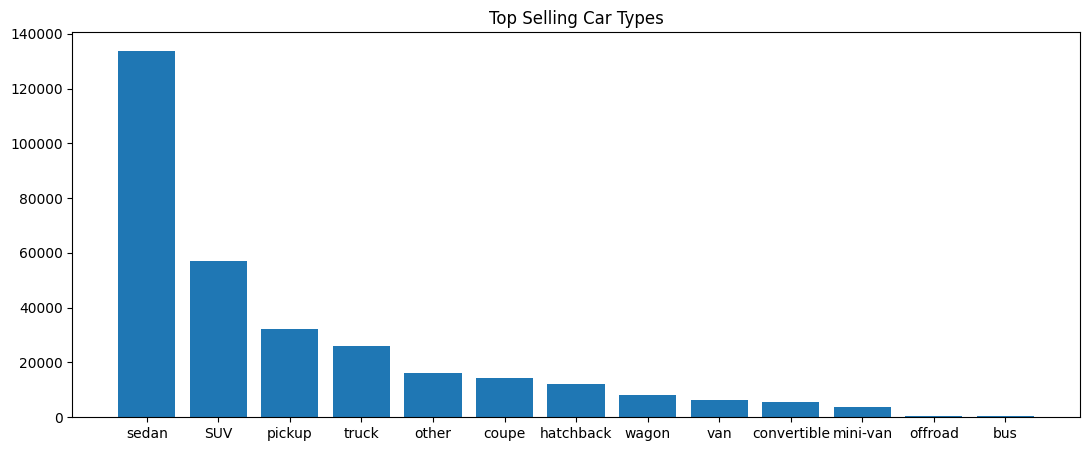

In [ ]:
plt.figure(figsize=(13,5))
plt.title("Top Selling Car Types")
plt.bar(dfcountTypes.index,dfcountTypes["num_of_veh"])
plt.show()


In [ ]:
query6 = """

SELECT car_type,model,manufacturer FROM vehicles_details WHERE stay_length='short'

"""

cursor.execute(query6)
combined = cursor.fetchall()combined


x =[]

for i in combined:
    if i[2] == 'ford':
        x.append(i)
x

fords =[i[0] for i in x]
# fords





In [ ]:
fordsNum =  [(i,fords.count(i)) for i in set(fords)]


dfFords = pd.DataFrame(data=fordsNum,columns=["type","num"]).set_index("type").sort_values(by=["num"],ascending=False)
dfFords.sort_values(by=["num"],ascending=False)



In [ ]:
chevy=[]

for i in combined:
    if i[2] == 'chevrolet':
        chevy.append(i)


chevrolet =[i[0] for i in chevy ]
chevrolet

chevs = [(i,chevrolet.count(i)) for i in set(chevrolet)]
dfChevs = pd.DataFrame(data=chevs,columns=["type","num"]).set_index("type").sort_values(by=["num"],ascending=False)
dfChevs.sort_values(by=["num"],ascending=False)


In [7]:
toyo = []

for i in combined:
    if i[2] == "toyota":
        toyo.append(i)
toyots = [i[0] for i in toyo]
toyots

toyotas = [(i,toyots.count(i)) for i in set(toyots)]

dfToyots = pd.DataFrame(data=toyotas,columns=(["type","num"])).set_index("type")
dfToyots.sort_values(by=["num"],ascending=False,inplace=True)


,num
type,
sedan,10565
SUV,4215
pickup,4009
truck,1915
hatchback,1386
other,1030
wagon,881
mini-van,587
van,414


In [68]:
top3 = np.array(["ford","nissan","toyota"])
top3

dictManufac = {
    
    "ford": dfFords.copy(deep=True).iloc[:4].sort_values(by=["type"],ascending=False).values.reshape(4),
    "chevrolet": dfChevs.copy(deep=True).iloc[:4].sort_values(by=["type"],ascending=False).values.reshape(4),
    "toyota": dfToyots.copy(deep=True).iloc[:4].sort_values(by=["type"],ascending=False).values.reshape(4)
}






array({'ford': array([10273, 24673, 10267,  8113], dtype=int64), 'chevrolet': array([ 5567, 15213,  7231,  5617], dtype=int64), 'toyota': array([ 1915, 10565,  4009,  4215], dtype=int64)},
      dtype=object)

In [ ]:


fordBar = plt.bar(dictManufac["ford"].index,dictManufac["ford"]["num"])
chevBar = plt.bar(dictManufac["chevrolet"].index,dictManufac["chevrolet"]["num"])
toyBar = plt.bar(dictManufac["toyota"].index,dictManufac["toyota"]["num"])


plt.show()

In [78]:
names = ["ford","chevrolet","toyota"]
labels=["truck","sedan","pickup","suv"]

dictNew ={
  "truck":[dictManufac[i][0] for i in dictManufac],
  "sedan":[dictManufac[i][1]for i in dictManufac],
  "pickup":[dictManufac[i][2] for i in dictManufac],
  "suv":[dictManufac[i][3] for i in dictManufac]
  
}





{'truck': [10273, 5567, 1915],
 'sedan': [24673, 15213, 10565],
 'pickup': [10267, 7231, 4009],
 'suv': [8113, 5617, 4215]}

<Figure size 1200x800 with 0 Axes>

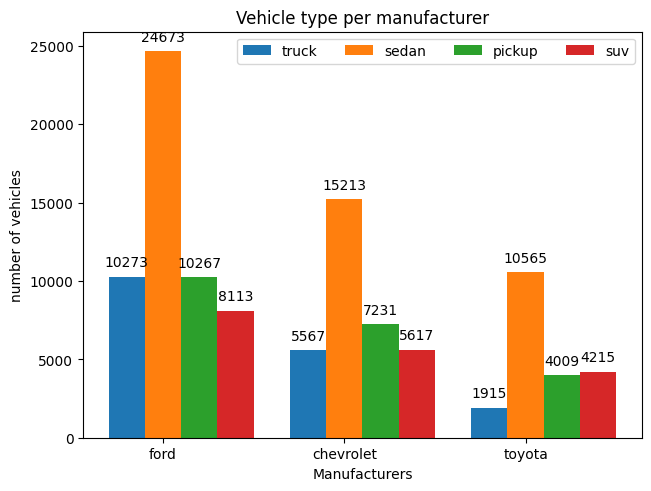

In [96]:
# f = dictManufac["ford"]
# c =dictManufac["chevrolet"]
# t = dictManufac["toyota"]


plt.figure(figsize=(12,8))


x=np.arange(len(names))
width = 0.2
multiplier = 0

fig,ax = plt.subplots(layout="constrained")


for att,val in dictNew.items():
    offset = width*multiplier
    bars = ax.bar(x+offset,val,width,label=att)
    ax.bar_label(bars,padding=5)
    multiplier+=1
    

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('number of vehicles')
ax.set_xlabel("Manufacturers")
ax.set_title('Vehicle type per manufacturer')
ax.set_xticks(x + width, names)
ax.legend(loc='best', ncols=4)


plt.show()








